# Entrega HealthCare 
- Erick Alexei Cambray Servin

In [213]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import  SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import train_test_split

sns.set()

## Carga y exploración de datos

In [214]:
path2Data= 'data/healthcare.csv'
df = pd.read_csv(path2Data)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Primero vemos un poco del dataset que se tiene dentro y como es que están sus valores.

In [216]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [217]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Análisis uni y mulitvariado 

Dentro del análisis de cada una de las variables podemos ver que no hay realmente una correlación clara entre ellas

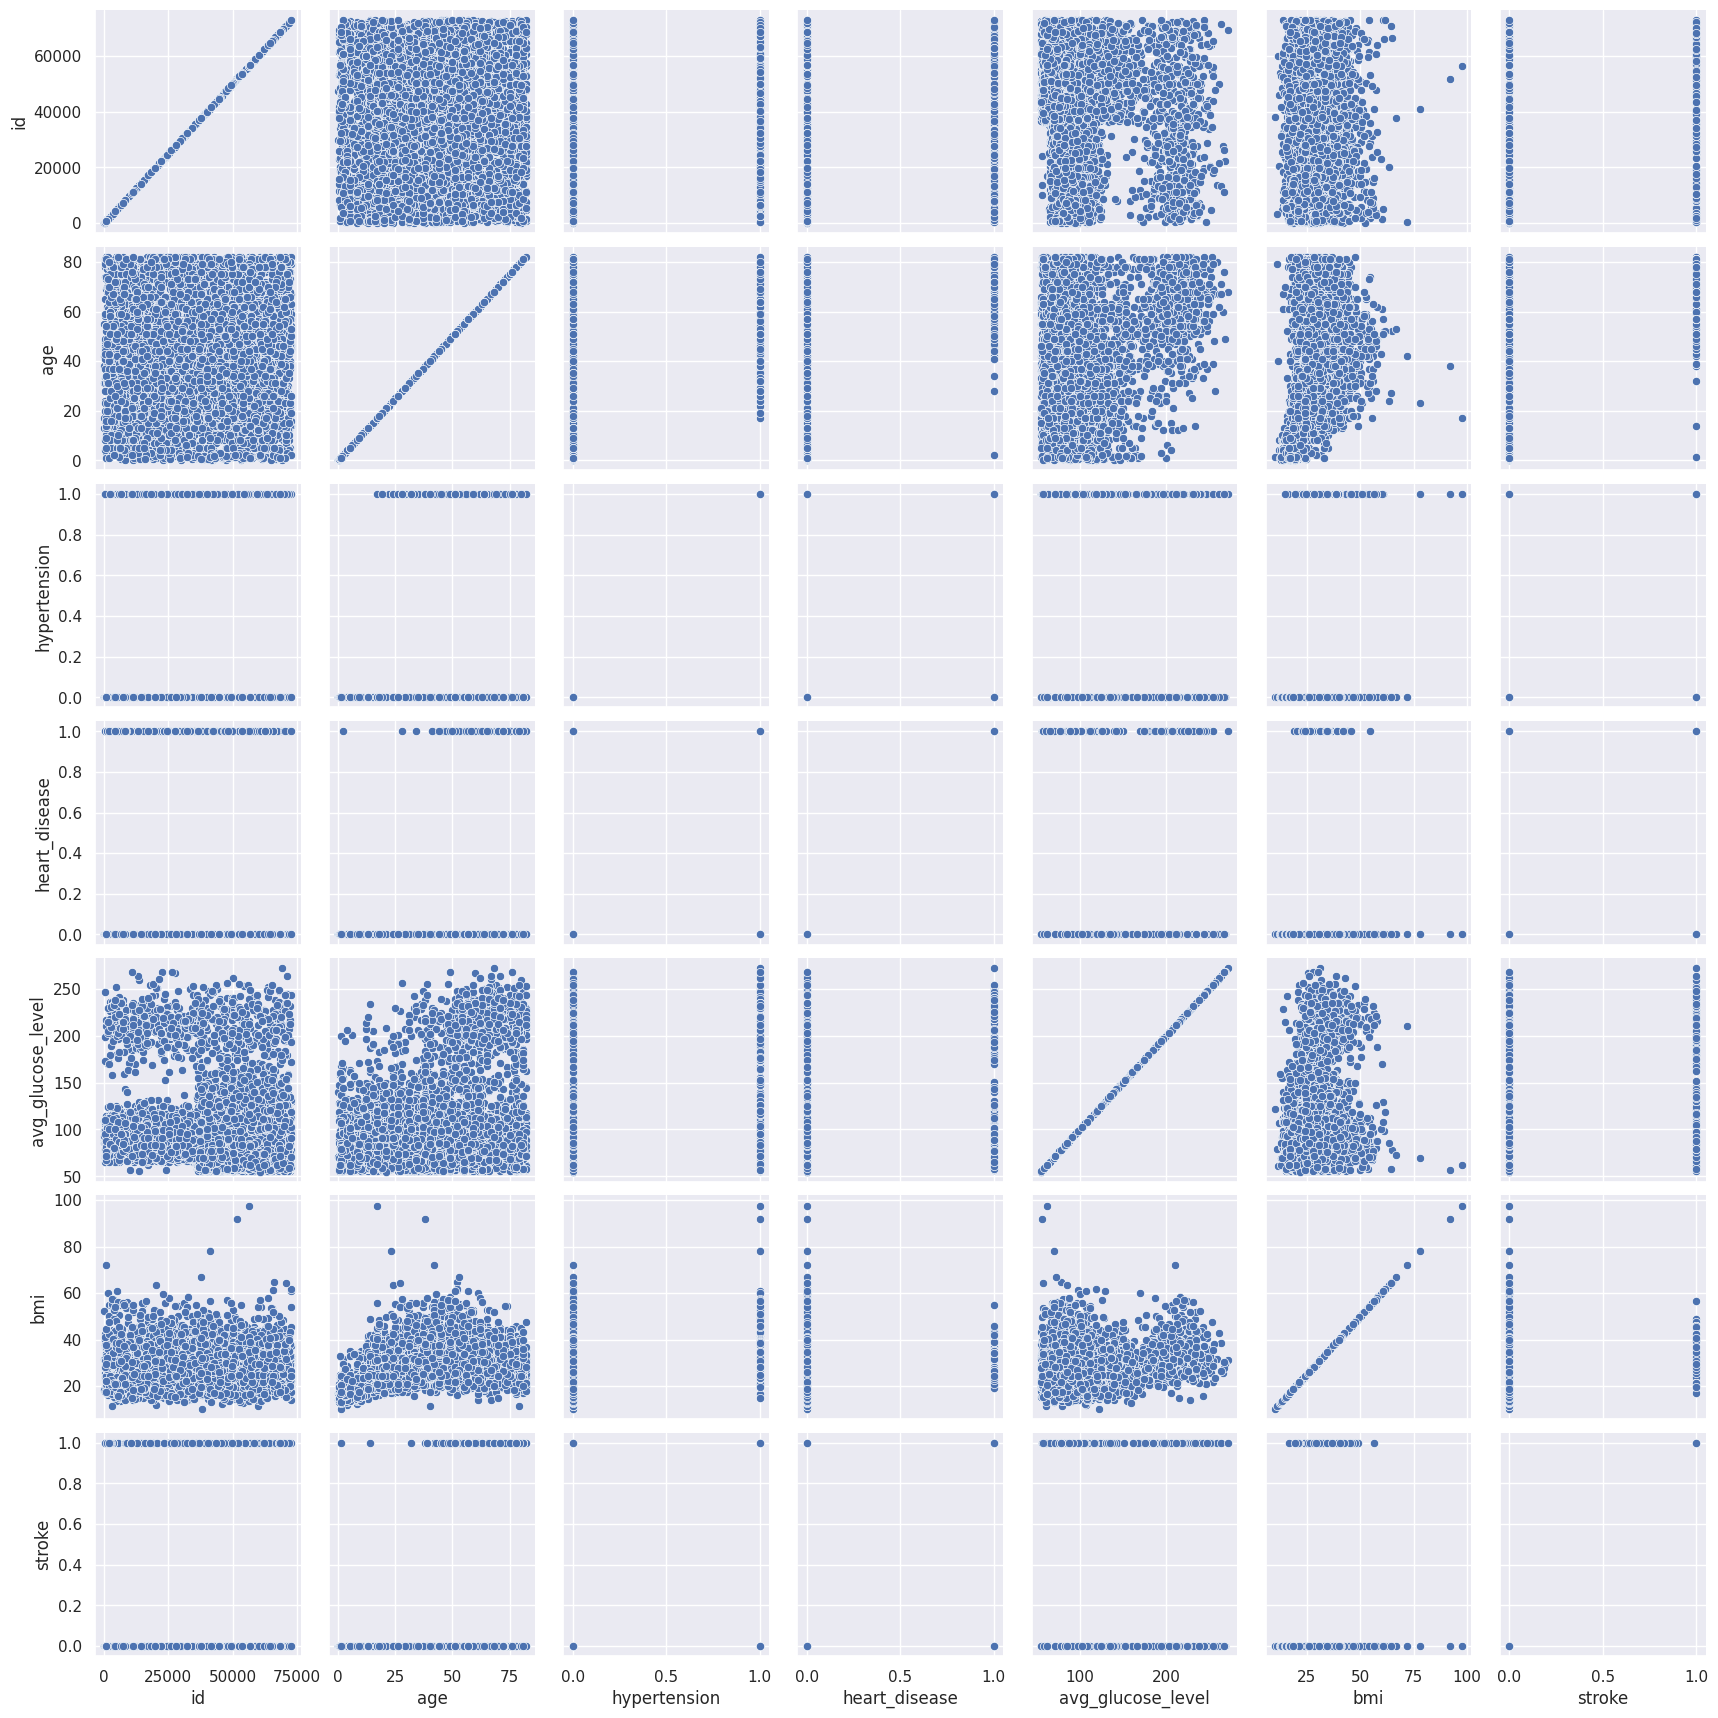

In [218]:
sns.pairplot(df, diag_kind= None)

Haciendo el análisis de como es que las variables están siendo afectadas por la variable onjetivo podemos ver que realmente es una clase minoritaria por lo que tal vez necesitaría de limpieza o muestreo para poder hacer correctamente el modelo.

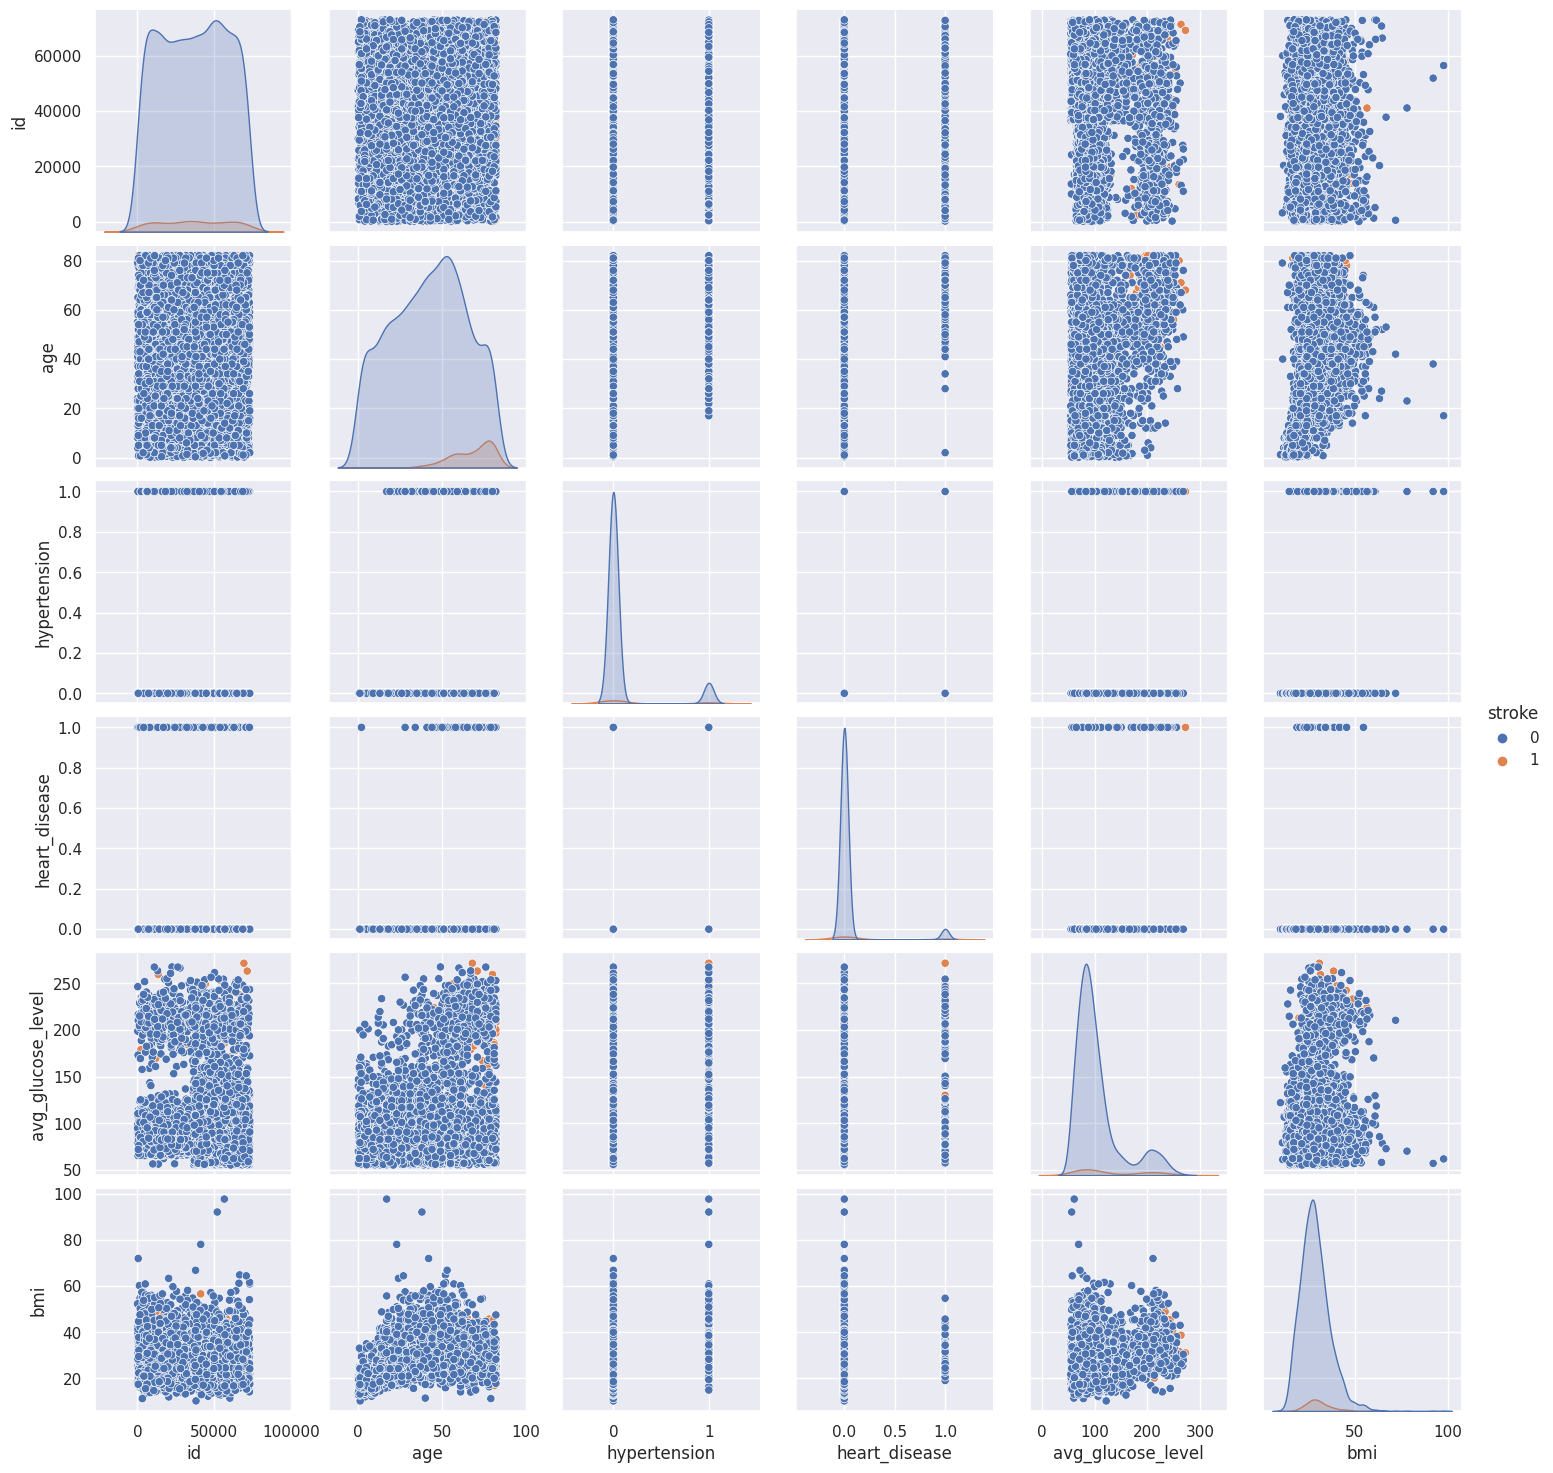

In [219]:
sns.pairplot(df, hue= 'stroke')

Vemos que si hay algunos datos NaN pero al ser en un valor numérico continuo entonces los imputaré

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

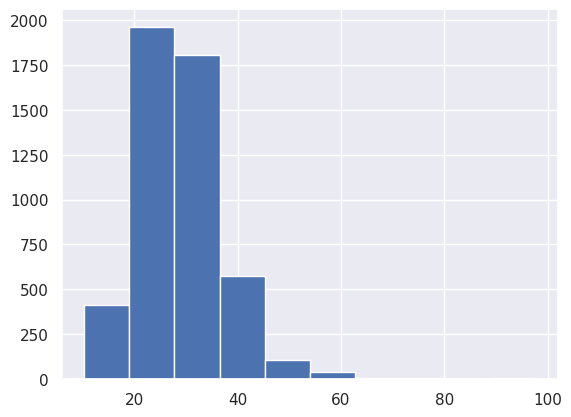

In [220]:
df.bmi.hist()
df.bmi.describe()

Se nota que los datos están centrados y tiene una baja varianza por lo que se pude trabajar ahora en imputar su media en lugar de la mediana

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Separación de las variables y creación de imputación de datos

In [222]:
um = ['id']
cat_var = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
cont_var = ['avg_glucose_level', 'bmi']
targt = ['stroke']


<AxesSubplot: >

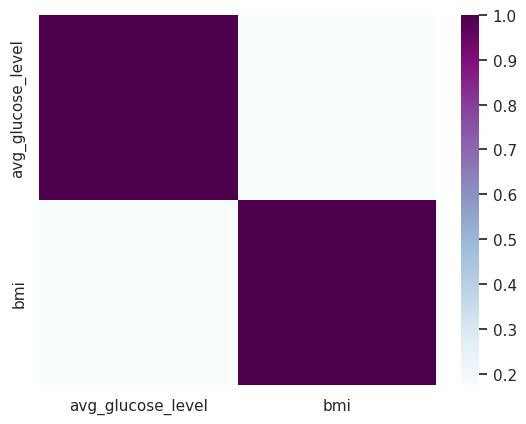

In [223]:
sns.heatmap(df[cont_var].corr(), cmap='BuPu')

Podemos ver que las variables continuas no tienen una correlación marcada por lo que no podríamos imputar con la relación entre ellas por lo que me quedaré con una imputación al promedio

In [224]:
impute_mean = SimpleImputer(strategy='mean')
df[['bmi']] = impute_mean.fit_transform(df[['bmi']])

Frecuencia de cada variable categorica

Primero un cuadro de prueba para ver como es que funciona

In [225]:
aux = df[cat_var[0]].value_counts(normalize = True).to_frame()
aux['test'] = np.where(aux.iloc[:,0]<0.05, 'test', aux.index)
aux

,gender,test
Female,0.585910,Female
Male,0.413894,Male
Other,0.000196,test


Hacemos la función de normalización

In [226]:
def normalizacion(df, v, umbral):
    aux = df[v].value_counts(True).to_frame()
    
    aux[f'n_{v}'] = np.where( aux[v] < umbral, 'Otros' , aux.index)
    moda = aux.head(1)[f'n_{v}'].values[0]

    if aux.loc[aux[f'n_{v}'] == 'Otros'][v].sum() < umbral:
        aux[f'n_{v}'].replace({'Otros':moda} , inplace=True)

    aux.drop(v, axis=1, inplace=True)
    aux.reset_index(inplace=True)
    
    return df.merge(aux,left_on=[v], right_on='index', how='inner').drop('index',axis=1)

In [227]:
for v in cat_var:
    df = normalizacion(df, v, 0.05)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,n_gender,n_age,n_hypertension,n_heart_disease,n_ever_married,n_work_type,n_Residence_type,n_smoking_status
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Male,Otros,0,1,Yes,Private,Urban,formerly smoked
1,52593,Male,78.00,0,1,Yes,Private,Urban,145.03,26.800000,formerly smoked,0,Male,Otros,0,1,Yes,Private,Urban,formerly smoked
2,53990,Male,64.00,0,1,Yes,Private,Urban,211.35,30.700000,formerly smoked,0,Male,Otros,0,1,Yes,Private,Urban,formerly smoked
3,49279,Male,57.00,0,1,Yes,Private,Urban,76.50,29.200000,formerly smoked,0,Male,Otros,0,1,Yes,Private,Urban,formerly smoked
4,4498,Male,71.00,0,1,Yes,Private,Urban,204.98,28.893237,formerly smoked,0,Male,Otros,0,1,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,51106,Female,1.48,0,0,No,children,Rural,123.10,20.600000,Unknown,0,Female,Otros,0,0,No,children,Rural,Unknown
5106,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0,Male,Otros,0,0,No,Private,Rural,Unknown
5107,16556,Male,13.00,0,0,No,Never_worked,Rural,111.48,20.800000,Unknown,0,Male,Otros,0,0,No,Private,Rural,Unknown
5108,28461,Male,15.00,0,0,No,Never_worked,Rural,79.59,28.400000,Unknown,0,Male,Otros,0,0,No,Private,Rural,Unknown


In [228]:
var_norm = [x for x in df.columns if x[0] == 'n']
var_norm

['n_gender',
 'n_age',
 'n_hypertension',
 'n_heart_disease',
 'n_ever_married',
 'n_work_type',
 'n_Residence_type',
 'n_smoking_status']

Ahora tenemos que discretizar las dos variables continuas que tenemos y después hacer el mismo proceso de normalización para esas variables.


In [229]:
def discretizacion(df, v, k):
    disc_model = KBinsDiscretizer(n_bins= k, encode= 'ordinal', strategy='quantile')
    disc_model.fit(np.array(df[v]).reshape(-1,1))
    df[f'd_{v}_{k}'] = pd.cut(df[v], bins= disc_model.bin_edges_[0], include_lowest=True).astype(str)
    return df
    

In [230]:
for v in cont_var:
    for k in range(2,8):
        df = discretizacion(df, v, k)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,d_avg_glucose_level_4,d_avg_glucose_level_5,d_avg_glucose_level_6,d_avg_glucose_level_7,d_bmi_2,d_bmi_3,d_bmi_4,d_bmi_5,d_bmi_6,d_bmi_7
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.600000,...,"(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(150.004, 271.74]","(28.4, 97.6]","(30.9, 97.6]","(32.8, 97.6]","(34.3, 97.6]","(35.5, 97.6]","(36.4, 97.6]"
1,52593,Male,78.00,0,1,Yes,Private,Urban,145.03,26.800000,...,"(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(110.323, 150.004]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(26.7, 29.5]","(25.4, 28.4]","(24.5, 27.157]"
2,53990,Male,64.00,0,1,Yes,Private,Urban,211.35,30.700000,...,"(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(150.004, 271.74]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(29.5, 34.3]","(28.4, 30.9]","(28.9, 32.0]"
3,49279,Male,57.00,0,1,Yes,Private,Urban,76.50,29.200000,...,"(55.119, 77.245]","(73.76, 85.6]","(71.375, 82.05]","(69.661, 79.241]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(26.7, 29.5]","(28.4, 30.9]","(28.9, 32.0]"
4,4498,Male,71.00,0,1,Yes,Private,Urban,204.98,28.893237,...,"(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(150.004, 271.74]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(26.7, 29.5]","(28.4, 30.9]","(27.157, 28.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,51106,Female,1.48,0,0,No,children,Rural,123.10,20.600000,...,"(114.09, 271.74]","(98.914, 124.16]","(104.72, 136.215]","(110.323, 150.004]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]"
5106,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.100000,...,"(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(150.004, 271.74]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]"
5107,16556,Male,13.00,0,0,No,Never_worked,Rural,111.48,20.800000,...,"(91.885, 114.09]","(98.914, 124.16]","(104.72, 136.215]","(110.323, 150.004]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]"
5108,28461,Male,15.00,0,0,No,Never_worked,Rural,79.59,28.400000,...,"(77.245, 91.885]","(73.76, 85.6]","(71.375, 82.05]","(79.241, 87.369]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(26.7, 29.5]","(25.4, 28.4]","(27.157, 28.9]"


Ahora de todas las variables que creamos vamos a ver cuales son las mejores con su Information Value

In [231]:
def get_iv(df, v, tgt):
    # print(v)
    pivot = df.pivot_table(index=v,
                    columns= tgt,
                    values= um[0],
                    aggfunc= 'count',
                    fill_value= 0)
    
    pivot[list(range(2))] = pivot/pivot.apply(np.sum)
    pivot['w'] = np.log(pivot[0]/pivot[1])
    pivot['iv'] = (pivot[0] - pivot[1]) * pivot['w']
    

    return v, pivot['iv'].sum()

- Primero lo que hace la función es poner a cada una de las variables es un modo de ver como es que está repartidas las clases de nuestra variable objetivo.
- Después se saca la proporción de las variables que predicen cada clase.
- Ya teniendo la proporción se saca su logaritmo del momio de la probabilidad clásica con la finalidad que esté centrado en cero (es solo notación el logaritmo)
- Se saca la diferencia de la proporción de las variables y se multiplica por su predictibilidad

In [232]:
pivot = df.pivot_table(index='d_avg_glucose_level_2',
                    columns= targt,
                    values= um,
                    aggfunc= 'count',
                    fill_value= 1)
print(pivot)
pivot[list(range(2))] = pivot/pivot.apply(np.sum)
print(pivot)
pivot['w'] = np.log(pivot[0]/pivot[1])
# print(pivot[0], pivot[1])
print(pivot)
pivot['iv'] = (pivot[0] - pivot[1]) * pivot['w']
print(pivot)


                         id     
stroke                    0    1
d_avg_glucose_level_2           
(55.119, 91.885]       2462   93
(91.885, 271.74]       2399  156
                         id             0         1
stroke                    0    1                   
d_avg_glucose_level_2                              
(55.119, 91.885]       2462   93  0.50648  0.373494
(91.885, 271.74]       2399  156  0.49352  0.626506
                         id             0         1         w
stroke                    0    1                             
d_avg_glucose_level_2                                        
(55.119, 91.885]       2462   93  0.50648  0.373494  0.304583
(91.885, 271.74]       2399  156  0.49352  0.626506 -0.238595
                         id             0         1         w        iv
stroke                    0    1                                       
d_avg_glucose_level_2                                                  
(55.119, 91.885]       2462   93  0.50648  0.3734

In [233]:
get_iv(df, [x for x in df.columns if x[0] == 'd'], targt)

(['d_avg_glucose_level_2',
  'd_avg_glucose_level_3',
  'd_avg_glucose_level_4',
  'd_avg_glucose_level_5',
  'd_avg_glucose_level_6',
  'd_avg_glucose_level_7',
  'd_bmi_2',
  'd_bmi_3',
  'd_bmi_4',
  'd_bmi_5',
  'd_bmi_6',
  'd_bmi_7'],
 inf)

In [234]:

var_disc = [x for x in df.columns if x[0] == 'd']
df[var_disc + targt]

,d_avg_glucose_level_2,d_avg_glucose_level_3,d_avg_glucose_level_4,d_avg_glucose_level_5,d_avg_glucose_level_6,d_avg_glucose_level_7,d_bmi_2,d_bmi_3,d_bmi_4,d_bmi_5,d_bmi_6,d_bmi_7,stroke
0,"(91.885, 271.74]","(104.72, 271.74]","(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(150.004, 271.74]","(28.4, 97.6]","(30.9, 97.6]","(32.8, 97.6]","(34.3, 97.6]","(35.5, 97.6]","(36.4, 97.6]",1
1,"(91.885, 271.74]","(104.72, 271.74]","(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(110.323, 150.004]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(26.7, 29.5]","(25.4, 28.4]","(24.5, 27.157]",0
2,"(91.885, 271.74]","(104.72, 271.74]","(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(150.004, 271.74]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(29.5, 34.3]","(28.4, 30.9]","(28.9, 32.0]",0
3,"(55.119, 91.885]","(55.119, 82.05]","(55.119, 77.245]","(73.76, 85.6]","(71.375, 82.05]","(69.661, 79.241]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(26.7, 29.5]","(28.4, 30.9]","(28.9, 32.0]",0
4,"(91.885, 271.74]","(104.72, 271.74]","(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(150.004, 271.74]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(26.7, 29.5]","(28.4, 30.9]","(27.157, 28.9]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,"(91.885, 271.74]","(104.72, 271.74]","(114.09, 271.74]","(98.914, 124.16]","(104.72, 136.215]","(110.323, 150.004]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]",0
5106,"(91.885, 271.74]","(104.72, 271.74]","(114.09, 271.74]","(124.16, 271.74]","(136.215, 271.74]","(150.004, 271.74]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]",0
5107,"(91.885, 271.74]","(104.72, 271.74]","(91.885, 114.09]","(98.914, 124.16]","(104.72, 136.215]","(110.323, 150.004]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]",0
5108,"(55.119, 91.885]","(55.119, 82.05]","(77.245, 91.885]","(73.76, 85.6]","(71.375, 82.05]","(79.241, 87.369]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(26.7, 29.5]","(25.4, 28.4]","(27.157, 28.9]",0


La parte de arriba fue solo para poder hacer una visualización de como es que el algoritmo va creando las columnas ahora para poderlo aplicar vamos a hacer una partición y de forma aleatoria poderlo ver.

In [235]:
Xt_iv, Xv_iv, yt_iv, yv_iv = train_test_split(df[var_disc + targt][var_disc],df[var_disc + targt][targt], train_size= 0.7)
print(Xt_iv.shape, Xv_iv.shape, yt_iv.shape, yv_iv.shape)

(3577, 12) (1533, 12) (3577, 1) (1533, 1)


In [236]:
df_train_iv = df.loc[Xt_iv.index, um +var_disc + targt]
df_train_iv

,id,d_avg_glucose_level_2,d_avg_glucose_level_3,d_avg_glucose_level_4,d_avg_glucose_level_5,d_avg_glucose_level_6,d_avg_glucose_level_7,d_bmi_2,d_bmi_3,d_bmi_4,d_bmi_5,d_bmi_6,d_bmi_7,stroke
2635,20391,"(55.119, 91.885]","(55.119, 82.05]","(55.119, 77.245]","(55.119, 73.76]","(55.119, 71.375]","(55.119, 69.661]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(29.5, 34.3]","(28.4, 30.9]","(28.9, 32.0]",0
694,16535,"(55.119, 91.885]","(82.05, 104.72]","(77.245, 91.885]","(85.6, 98.914]","(82.05, 91.885]","(87.369, 96.759]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(26.7, 29.5]","(25.4, 28.4]","(27.157, 28.9]",0
4463,14036,"(91.885, 271.74]","(82.05, 104.72]","(91.885, 114.09]","(98.914, 124.16]","(91.885, 104.72]","(96.759, 110.323]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(26.7, 29.5]","(28.4, 30.9]","(28.9, 32.0]",0
3705,18616,"(55.119, 91.885]","(82.05, 104.72]","(77.245, 91.885]","(73.76, 85.6]","(82.05, 91.885]","(79.241, 87.369]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(23.8, 28.4]","(22.7, 26.7]","(21.8, 25.4]","(21.2, 24.5]",0
2100,10997,"(91.885, 271.74]","(82.05, 104.72]","(91.885, 114.09]","(85.6, 98.914]","(91.885, 104.72]","(96.759, 110.323]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(23.8, 28.4]","(22.7, 26.7]","(21.8, 25.4]","(21.2, 24.5]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,27480,"(55.119, 91.885]","(82.05, 104.72]","(77.245, 91.885]","(85.6, 98.914]","(82.05, 91.885]","(79.241, 87.369]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(22.7, 26.7]","(25.4, 28.4]","(24.5, 27.157]",0
805,72011,"(55.119, 91.885]","(82.05, 104.72]","(77.245, 91.885]","(85.6, 98.914]","(82.05, 91.885]","(79.241, 87.369]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(22.7, 26.7]","(25.4, 28.4]","(24.5, 27.157]",0
1433,68601,"(55.119, 91.885]","(55.119, 82.05]","(55.119, 77.245]","(55.119, 73.76]","(55.119, 71.375]","(55.119, 69.661]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]",0
5077,14877,"(91.885, 271.74]","(104.72, 271.74]","(114.09, 271.74]","(124.16, 271.74]","(104.72, 136.215]","(110.323, 150.004]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]",0


Seleccionamos la mejor de cada grupo de las discretizadas

In [237]:
iv = pd.DataFrame(map(lambda v: get_iv(df_train_iv,v, targt), var_disc),
                    columns= ['columna', 'iv'])
iv['raiz'] = iv['columna'].map( lambda x: '_'.join(x.split('_')[1:2]))
iv = iv.sort_values(by=['raiz','iv'],ascending=[1,0]).reset_index(drop=True)
iv['id'] = iv.groupby('raiz').cumcount()+1
iv = iv.loc[iv.id == 1]

iv.drop(columns=['raiz','id'],inplace=True)
iv

,columna,iv
0,d_avg_glucose_level_7,0.417757
6,d_bmi_7,0.250223


In [238]:
besti = iv['columna'].tolist()
besti

['d_avg_glucose_level_7', 'd_bmi_7']

Ahora seleccionamos de las normalizadas

In [239]:
df_train_iv = df.loc[Xt_iv.index,:]
df_train_iv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,d_avg_glucose_level_4,d_avg_glucose_level_5,d_avg_glucose_level_6,d_avg_glucose_level_7,d_bmi_2,d_bmi_3,d_bmi_4,d_bmi_5,d_bmi_6,d_bmi_7
2635,20391,Female,73.00,0,0,Yes,Govt_job,Rural,65.93,30.3,...,"(55.119, 77.245]","(55.119, 73.76]","(55.119, 71.375]","(55.119, 69.661]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(29.5, 34.3]","(28.4, 30.9]","(28.9, 32.0]"
694,16535,Female,34.00,0,0,No,Private,Rural,90.15,27.9,...,"(77.245, 91.885]","(85.6, 98.914]","(82.05, 91.885]","(87.369, 96.759]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(26.7, 29.5]","(25.4, 28.4]","(27.157, 28.9]"
4463,14036,Male,44.00,0,0,Yes,Private,Rural,101.46,29.4,...,"(91.885, 114.09]","(98.914, 124.16]","(91.885, 104.72]","(96.759, 110.323]","(28.4, 97.6]","(25.4, 30.9]","(28.4, 32.8]","(26.7, 29.5]","(28.4, 30.9]","(28.9, 32.0]"
3705,18616,Female,41.00,0,0,Yes,Private,Urban,82.20,23.9,...,"(77.245, 91.885]","(73.76, 85.6]","(82.05, 91.885]","(79.241, 87.369]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(23.8, 28.4]","(22.7, 26.7]","(21.8, 25.4]","(21.2, 24.5]"
2100,10997,Female,38.00,0,0,Yes,Private,Rural,98.73,24.3,...,"(91.885, 114.09]","(85.6, 98.914]","(91.885, 104.72]","(96.759, 110.323]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(23.8, 28.4]","(22.7, 26.7]","(21.8, 25.4]","(21.2, 24.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,27480,Male,19.00,0,0,No,Private,Rural,86.19,26.2,...,"(77.245, 91.885]","(85.6, 98.914]","(82.05, 91.885]","(79.241, 87.369]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(22.7, 26.7]","(25.4, 28.4]","(24.5, 27.157]"
805,72011,Male,51.00,0,0,No,Self-employed,Rural,87.15,26.4,...,"(77.245, 91.885]","(85.6, 98.914]","(82.05, 91.885]","(79.241, 87.369]","(10.299000000000001, 28.4]","(25.4, 30.9]","(23.8, 28.4]","(22.7, 26.7]","(25.4, 28.4]","(24.5, 27.157]"
1433,68601,Female,18.00,0,0,No,Private,Urban,67.92,19.4,...,"(55.119, 77.245]","(55.119, 73.76]","(55.119, 71.375]","(55.119, 69.661]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]"
5077,14877,Male,0.56,0,0,No,children,Rural,127.23,20.1,...,"(114.09, 271.74]","(124.16, 271.74]","(104.72, 136.215]","(110.323, 150.004]","(10.299000000000001, 28.4]","(10.299000000000001, 25.4]","(10.299000000000001, 23.8]","(10.299000000000001, 22.7]","(10.299000000000001, 21.8]","(10.299000000000001, 21.2]"


In [240]:
iv_n = pd.DataFrame(map(lambda v: get_iv(df_train_iv, v, targt), var_norm), columns= ['columna', 'iv'])
iv_n.sort_values(by= 'iv', ascending= False)

,columna,iv
5,n_work_type,0.501099
4,n_ever_married,0.433757
2,n_hypertension,0.214193
3,n_heart_disease,0.172805
7,n_smoking_status,0.116440
6,n_Residence_type,0.015122
0,n_gender,0.002864
1,n_age,0.000000


In [241]:
best = pd.concat([iv, iv_n])['columna'].tolist()
best

['d_avg_glucose_level_7',
 'd_bmi_7',
 'n_gender',
 'n_age',
 'n_hypertension',
 'n_heart_disease',
 'n_ever_married',
 'n_work_type',
 'n_Residence_type',
 'n_smoking_status']

WoE

In [242]:
X = df[best + um].copy()
y = df[targt + um].copy()
print(X.shape, y.shape)

(5110, 11) (5110, 2)


In [243]:
Xt, Xv, yt, yv = train_test_split(X, y, train_size= 0.7)
df_train_woe = Xt.merge(yt, on= 'id', how= 'inner')
df_train_woe

,d_avg_glucose_level_7,d_bmi_7,n_gender,n_age,n_hypertension,n_heart_disease,n_ever_married,n_work_type,n_Residence_type,n_smoking_status,id,stroke
0,"(55.119, 69.661]","(27.157, 28.9]",Female,Otros,0,0,Yes,Private,Rural,Unknown,66110,0
1,"(55.119, 69.661]","(21.2, 24.5]",Female,Otros,0,0,No,Govt_job,Urban,smokes,72725,0
2,"(150.004, 271.74]","(24.5, 27.157]",Female,Otros,0,0,Yes,Private,Rural,never smoked,36275,0
3,"(69.661, 79.241]","(32.0, 36.4]",Female,Otros,0,0,Yes,Private,Urban,never smoked,6606,0
4,"(79.241, 87.369]","(27.157, 28.9]",Male,Otros,0,0,No,children,Rural,Unknown,51959,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3572,"(69.661, 79.241]","(24.5, 27.157]",Female,Otros,0,0,Yes,Private,Urban,formerly smoked,21374,0
3573,"(79.241, 87.369]","(32.0, 36.4]",Female,Otros,0,0,Yes,Private,Rural,never smoked,29496,0
3574,"(87.369, 96.759]","(32.0, 36.4]",Female,Otros,0,0,Yes,Private,Rural,formerly smoked,26993,0
3575,"(79.241, 87.369]","(32.0, 36.4]",Male,Otros,0,1,Yes,Govt_job,Urban,formerly smoked,33779,0


In [244]:
def trans_woe(df, v, tgt):
    aux = df.pivot_table( index=v,
                          columns=tgt,
                          values=um[0],
                          aggfunc='count',
                          fill_value=0)

    aux[list(range(2))] = aux / aux.apply(np.sum)
    aux['w'] = np.log(aux[0] / aux[1])
    aux.drop(range(2) , axis=1 , inplace=True)
    aux = aux.to_dict()['w']
    
    return v, aux

In [245]:
mapa_woe = list(map( lambda v: trans_woe(df_train_woe, v, targt), best))
mapa_woe

[('d_avg_glucose_level_7',
  {'(110.323, 150.004]': 0.17810466692938245,
   '(150.004, 271.74]': -1.0212816746860993,
   '(55.119, 69.661]': 0.24307885012456787,
   '(69.661, 79.241]': -0.021340913525019177,
   '(79.241, 87.369]': 0.9045556109634872,
   '(87.369, 96.759]': 0.618065597705638,
   '(96.759, 110.323]': 0.19037961812371695}),
 ('d_bmi_7',
  {'(10.299000000000001, 21.2]': 1.9084195401398147,
   '(21.2, 24.5]': 0.10297461782650538,
   '(24.5, 27.157]': -0.007209410801026097,
   '(27.157, 28.9]': -0.728996120574543,
   '(28.9, 32.0]': 0.05226134582750748,
   '(32.0, 36.4]': -0.056946768979233536,
   '(36.4, 97.6]': 0.06778547937092354}),
 ('n_gender', {'Female': 0.09256002671396658, 'Male': -0.11765809530194847}),
 ('n_age', {'Otros': 0.0}),
 ('n_hypertension', {'0': 0.2710344293585114, '1': -1.2548572786296237}),
 ('n_heart_disease', {'0': 0.1440601161128542, '1': -1.3271943985408692}),
 ('n_ever_married', {'No': 1.2053097649826208, 'Yes': -0.32761403808239054}),
 ('n_work_ty

Ya que tenemos la correspondencia de cada variable tenemos que asignarla a la data tanto de entrenamiento como de validación

In [246]:
for v, mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)
Xt

,d_avg_glucose_level_7,d_bmi_7,n_gender,n_age,n_hypertension,n_heart_disease,n_ever_married,n_work_type,n_Residence_type,n_smoking_status,...,w_d_avg_glucose_level_7,w_d_bmi_7,w_n_gender,w_n_age,w_n_hypertension,w_n_heart_disease,w_n_ever_married,w_n_work_type,w_n_Residence_type,w_n_smoking_status
4503,"(55.119, 69.661]","(27.157, 28.9]",Female,Otros,0,0,Yes,Private,Rural,Unknown,...,0.243079,-0.728996,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,0.636935
3197,"(55.119, 69.661]","(21.2, 24.5]",Female,Otros,0,0,No,Govt_job,Urban,smokes,...,0.243079,0.102975,0.092560,0.0,0.271034,0.144060,1.205310,-0.027188,-0.014681,-0.102608
1910,"(150.004, 271.74]","(24.5, 27.157]",Female,Otros,0,0,Yes,Private,Rural,never smoked,...,-1.021282,-0.007209,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.031682
944,"(69.661, 79.241]","(32.0, 36.4]",Female,Otros,0,0,Yes,Private,Urban,never smoked,...,-0.021341,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,-0.014681,-0.031682
4952,"(79.241, 87.369]","(27.157, 28.9]",Male,Otros,0,0,No,children,Rural,Unknown,...,0.904556,-0.728996,-0.117658,0.0,0.271034,0.144060,1.205310,3.220158,0.015820,0.636935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,"(69.661, 79.241]","(24.5, 27.157]",Female,Otros,0,0,Yes,Private,Urban,formerly smoked,...,-0.021341,-0.007209,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,-0.014681,-0.523436
2175,"(79.241, 87.369]","(32.0, 36.4]",Female,Otros,0,0,Yes,Private,Rural,never smoked,...,0.904556,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.031682
615,"(87.369, 96.759]","(32.0, 36.4]",Female,Otros,0,0,Yes,Private,Rural,formerly smoked,...,0.618066,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.523436
382,"(79.241, 87.369]","(32.0, 36.4]",Male,Otros,0,1,Yes,Govt_job,Urban,formerly smoked,...,0.904556,-0.056947,-0.117658,0.0,0.271034,-1.327194,-0.327614,-0.027188,-0.014681,-0.523436


In [247]:
var_w = Xt.filter(like= 'w_').columns.tolist()
var_w

['w_d_avg_glucose_level_7',
 'w_d_bmi_7',
 'w_n_gender',
 'w_n_age',
 'w_n_hypertension',
 'w_n_heart_disease',
 'w_n_ever_married',
 'w_n_work_type',
 'w_n_Residence_type',
 'w_n_smoking_status']

In [248]:
tad_t = Xt[um + var_w]
tad_t

,id,w_d_avg_glucose_level_7,w_d_bmi_7,w_n_gender,w_n_age,w_n_hypertension,w_n_heart_disease,w_n_ever_married,w_n_work_type,w_n_Residence_type,w_n_smoking_status
4503,66110,0.243079,-0.728996,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,0.636935
3197,72725,0.243079,0.102975,0.092560,0.0,0.271034,0.144060,1.205310,-0.027188,-0.014681,-0.102608
1910,36275,-1.021282,-0.007209,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.031682
944,6606,-0.021341,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,-0.014681,-0.031682
4952,51959,0.904556,-0.728996,-0.117658,0.0,0.271034,0.144060,1.205310,3.220158,0.015820,0.636935
...,...,...,...,...,...,...,...,...,...,...,...
173,21374,-0.021341,-0.007209,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,-0.014681,-0.523436
2175,29496,0.904556,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.031682
615,26993,0.618066,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.523436
382,33779,0.904556,-0.056947,-0.117658,0.0,0.271034,-1.327194,-0.327614,-0.027188,-0.014681,-0.523436


Volvemos a hacer el análisis de las variabes

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'w_d_avg_glucose_level_7'}>,
        <AxesSubplot: title={'center': 'w_d_bmi_7'}>],
       [<AxesSubplot: title={'center': 'w_n_gender'}>,
        <AxesSubplot: title={'center': 'w_n_age'}>,
        <AxesSubplot: title={'center': 'w_n_hypertension'}>],
       [<AxesSubplot: title={'center': 'w_n_heart_disease'}>,
        <AxesSubplot: title={'center': 'w_n_ever_married'}>,
        <AxesSubplot: title={'center': 'w_n_work_type'}>],
       [<AxesSubplot: title={'center': 'w_n_Residence_type'}>,
        <AxesSubplot: title={'center': 'w_n_smoking_status'}>,
        <AxesSubplot: >]], dtype=object)

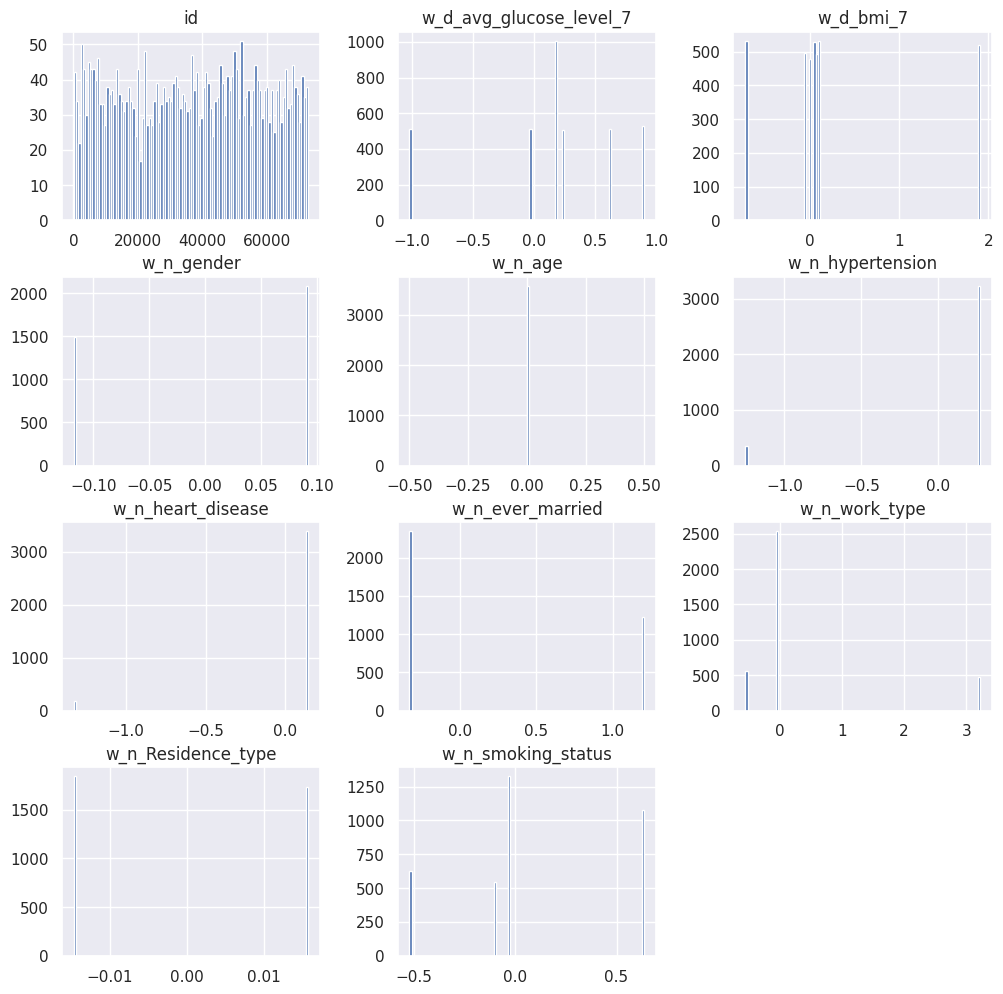

In [249]:
tad_t.hist(figsize=(12,12), bins= 100)

<AxesSubplot: >

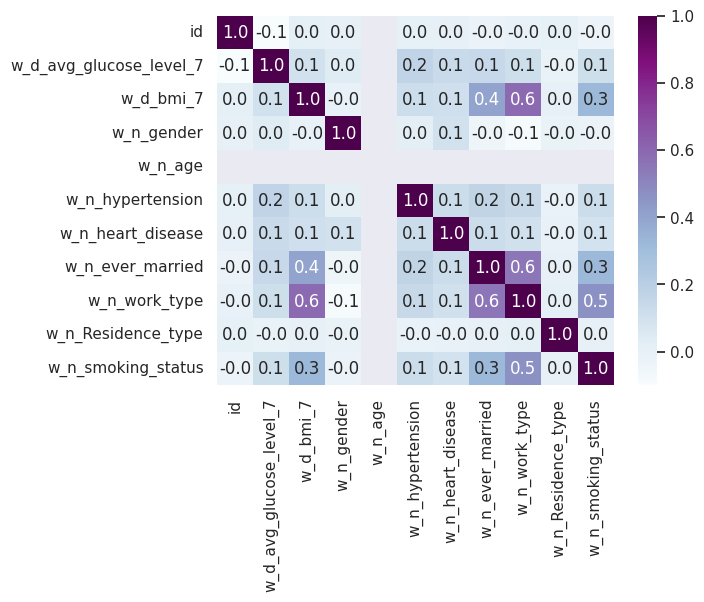

In [250]:
sns.heatmap(tad_t.corr(), cmap= 'BuPu', annot= True, fmt='0.1f')

Podemos ver que las variables ya están mucho más correlacionadas y tienen más en comun que como lo veíamos a un inicio porque ahora ya son comparables numericamente las categorícas y las numéricas.

In [255]:
tad = tad_t = Xt[um + var_w].merge(yt, on= um, how='inner')
tad.columns = ['id'] + [f'x_{x}' for x in tad.columns if x[0]== 'w'] + ['y_stroke']
tad

,id,x_w_d_avg_glucose_level_7,x_w_d_bmi_7,x_w_n_gender,x_w_n_age,x_w_n_hypertension,x_w_n_heart_disease,x_w_n_ever_married,x_w_n_work_type,x_w_n_Residence_type,x_w_n_smoking_status,y_stroke
0,66110,0.243079,-0.728996,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,0.636935,0
1,72725,0.243079,0.102975,0.092560,0.0,0.271034,0.144060,1.205310,-0.027188,-0.014681,-0.102608,0
2,36275,-1.021282,-0.007209,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.031682,0
3,6606,-0.021341,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,-0.014681,-0.031682,0
4,51959,0.904556,-0.728996,-0.117658,0.0,0.271034,0.144060,1.205310,3.220158,0.015820,0.636935,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3572,21374,-0.021341,-0.007209,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,-0.014681,-0.523436,0
3573,29496,0.904556,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.031682,0
3574,26993,0.618066,-0.056947,0.092560,0.0,0.271034,0.144060,-0.327614,-0.032192,0.015820,-0.523436,0
3575,33779,0.904556,-0.056947,-0.117658,0.0,0.271034,-1.327194,-0.327614,-0.027188,-0.014681,-0.523436,0


In [256]:
tad.to_pickle('Entregas_pkl/CAMBRAY_SERVIN_ERICK_healthcare.pkl')